# Errors and Noise - getting most of NISQ computers

## Reading:
* Short video describing the performance KPIs: https://www.youtube.com/watch?v=UpKseR066DQ
* Scale, Quality, and Speed: three key attributes to measure the performance of
near-term quantum computers (https://arxiv.org/pdf/2110.14108.pdf)
* https://research.ibm.com/blog/circuit-layer-operations-per-second

## Seeing the noise in practice

In [8]:
%matplotlib inline
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, IBMQ
from qiskit.visualization import *
from qiskit.tools.jupyter import *
import pprint
from qiskit.tools.monitor import backend_overview, backend_monitor
from qiskit.compiler import transpile, assemble
from qiskit.converters import circuit_to_dag
from qiskit.tools.visualization import dag_drawer
from qiskit.transpiler import PassManager
from qiskit.visualization import pass_manager_drawer
from qiskit.transpiler.passes import Unroller
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler

In [10]:
provider = IBMQ.load_account()

C:\Users\P39686820\AppData\Local\Temp\ipykernel_7024\2020123530.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [12]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [10]:
backend_overview()

ibm_kyoto                    ibm_brisbane
---------                    ------------
Num. Qubits:  127            Num. Qubits:  127
Pending Jobs: 437            Pending Jobs: 1446
Least busy:   True           Least busy:   False
Operational:  True           Operational:  True
Avg. T1:      207.0          Avg. T1:      221.0
Avg. T2:      124.8          Avg. T2:      144.3





In [11]:
backend = provider.get_backend('ibm_kyoto')

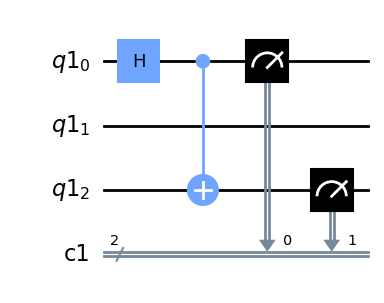

In [12]:
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])
circuit.cx(qr[0], qr[2])
circuit.measure(qr[0], cr[0])
circuit.measure(qr[2], cr[1])

circuit.draw(output='mpl')

In [16]:
#job = execute(circuit, backend=backend, shots=1024)
#job.status()

<JobStatus.QUEUED: 'job is queued'>

In [17]:
#job.job_id()

'cnmfdbnpzmsg008wvbv0'

In [28]:
#job.status()

<JobStatus.DONE: 'job has successfully run'>

In [29]:
#print(job.queue_position())

None


In [5]:
job=backend.retrieve_job('cnmfdbnpzmsg008wvbv0')

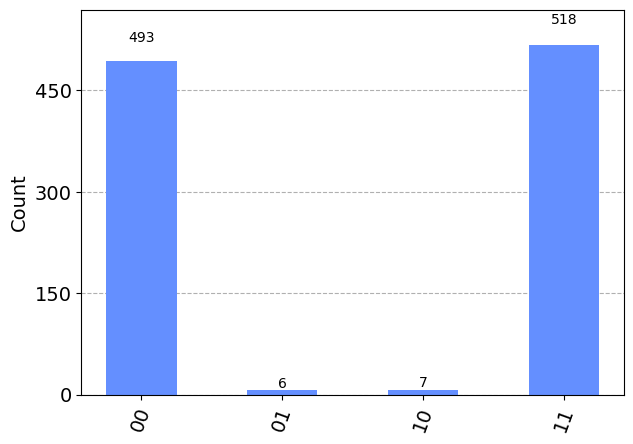

In [30]:
counts = job.result().get_counts()
plot_histogram(counts)

In [43]:
#QiskitRuntimeService.save_account(channel="ibm_quantum", overwrite='true', token="<TOKEN_HERE>")

In [7]:

service = QiskitRuntimeService(channel="ibm_quantum")
service.backends()

NameError: name 'QiskitRuntimeService' is not defined

In [45]:
service = QiskitRuntimeService(channel="ibm_quantum")
    
options = Options()
options.resilience_level = 1
options.optimization_level = 3
options.execution.shots = 1024

backend = service.backend("ibm_kyoto")
 
sampler = Sampler(backend, options=options) 

job = sampler.run(circuits=circuit)
print(f"Job ID is {job.job_id()}")

result = job.result()
print(f"Job result is {result}")

Job ID is cnmfzsfh4w80008vdrhg
Job result is SamplerResult(quasi_dists=[{0: 0.49745015462111025, 1: -0.00017764601264349996, 2: 0.0017254506774154917, 3: 0.5010020407141177}], metadata=[{'shots': 1024, 'circuit_metadata': {}, 'readout_mitigation_overhead': 1.0754961536130232, 'readout_mitigation_time': 0.020478270016610622, 'warning': 'Optimization level clipped from 3 to 1'}])


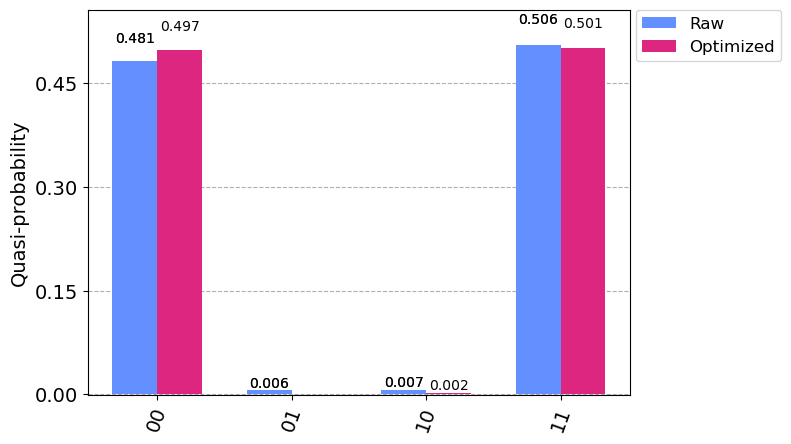

In [52]:
counts_optimized = result.quasi_dists[0].binary_probabilities()
plot_histogram([counts, counts_optimized], legend=["Raw", "Optimized"])

## Analyzing backend properties to understand it's limitatations and be able to tune the algorithms

In [31]:
backend_monitor(backend)

ibm_kyoto
Configuration
-------------
    n_qubits: 127
    operational: True
    status_msg: active
    pending_jobs: 431
    backend_version: 1.1.0
    basis_gates: ['id', 'rz', 'sx', 'x', 'ecr', 'reset']
    local: False
    simulator: False
    dtm: 0.5
    conditional: False
    max_experiments: 300
    meas_lo_range: [[6.662906469, 7.662906469], [6.605117237, 7.605117237000001], [6.725165908, 7.725165908], [6.665543788000001, 7.665543788000001], [6.602899025, 7.602899025], [6.727856934, 7.727856934], [6.273419141802618, 7.273419141802618], [6.663924424, 7.663924424], [6.786800789000001, 7.786800789000001], [6.844469730770056, 7.844469730770056], [6.730911285, 7.730911285], [6.280435650865449, 7.280435650865449], [6.784152216285989, 7.784152216285989], [6.665973495, 7.665973495], [6.603531184, 7.603531184], [6.785779648, 7.785779648], [6.404784098, 7.404784098], [6.400546725000001, 7.400546725000001], [6.790224451, 7.790224451], [6.852710139, 7.852710139000001], [6.275396819, 7.27

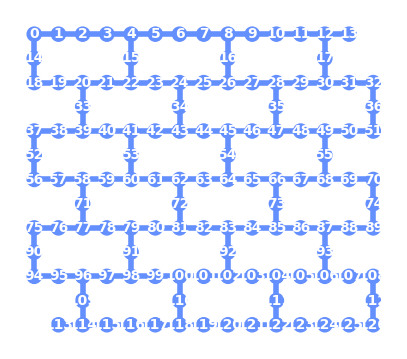

In [32]:
from qiskit.visualization import plot_gate_map
plot_gate_map(backend)

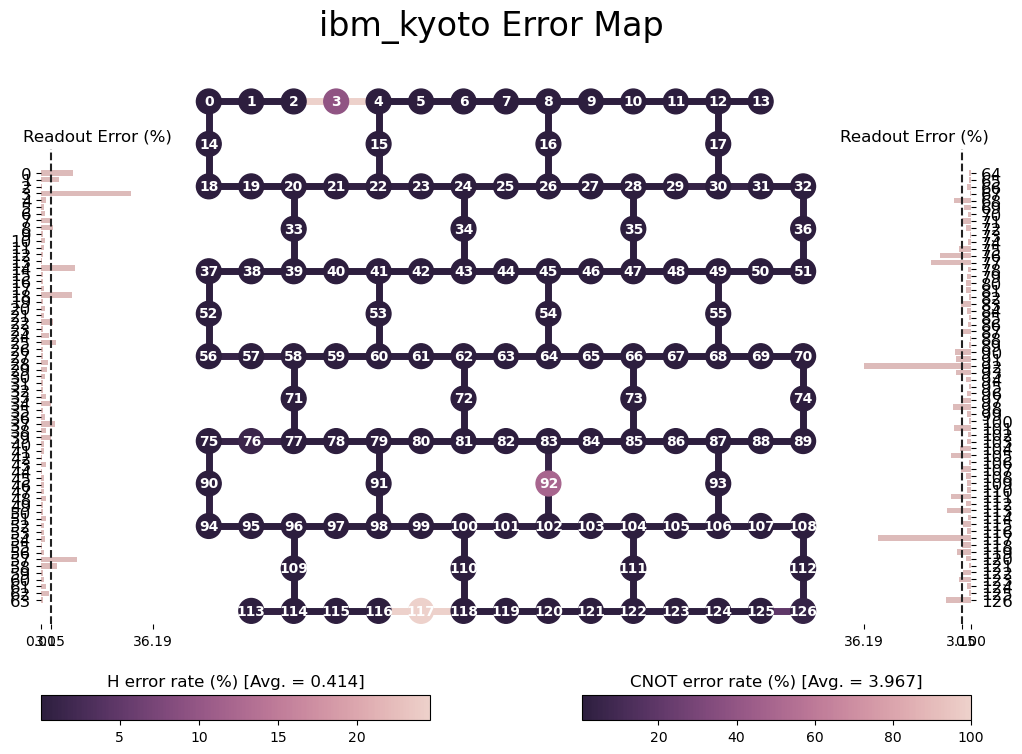

In [33]:
plot_error_map(backend)

## Transpilation

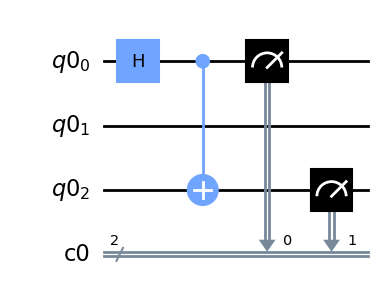

In [5]:
circuit.draw(output='mpl')

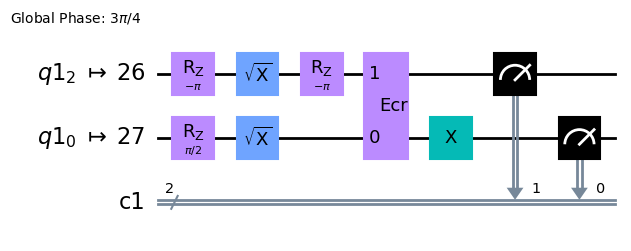

In [13]:
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw(output='mpl', idle_wires=False)

In [55]:
pprint.pprint(backend.configuration().basis_gates)

['ecr', 'id', 'rz', 'sx', 'x']


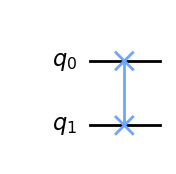

In [56]:
swap_example_circuit = QuantumCircuit(2)
swap_example_circuit.swap(0, 1)
swap_example_circuit.draw(output='mpl')

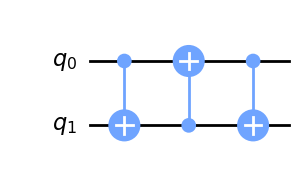

In [57]:
swap_example_circuit.decompose().draw(output='mpl')


# Transpiler optimization levels (USE THEM!!!)
* `optimization_level=0`: just maps the circuit to the backend, with no explicit optimization (except whatever optimizations the mapper does)

* `optimization_level=1`: maps the circuit, but also does light-weight optimizations by collapsing adjacent gates.

* `optimization_level=2`: medium-weight optimization, including a noise-adaptive layout and a gate-cancellation procedure based on gate commutation relationships.

* `optimization_level=3`: heavy-weight optimization, which in addition to previous steps, does resynthesis of two-qubit blocks of gates in the circuit.

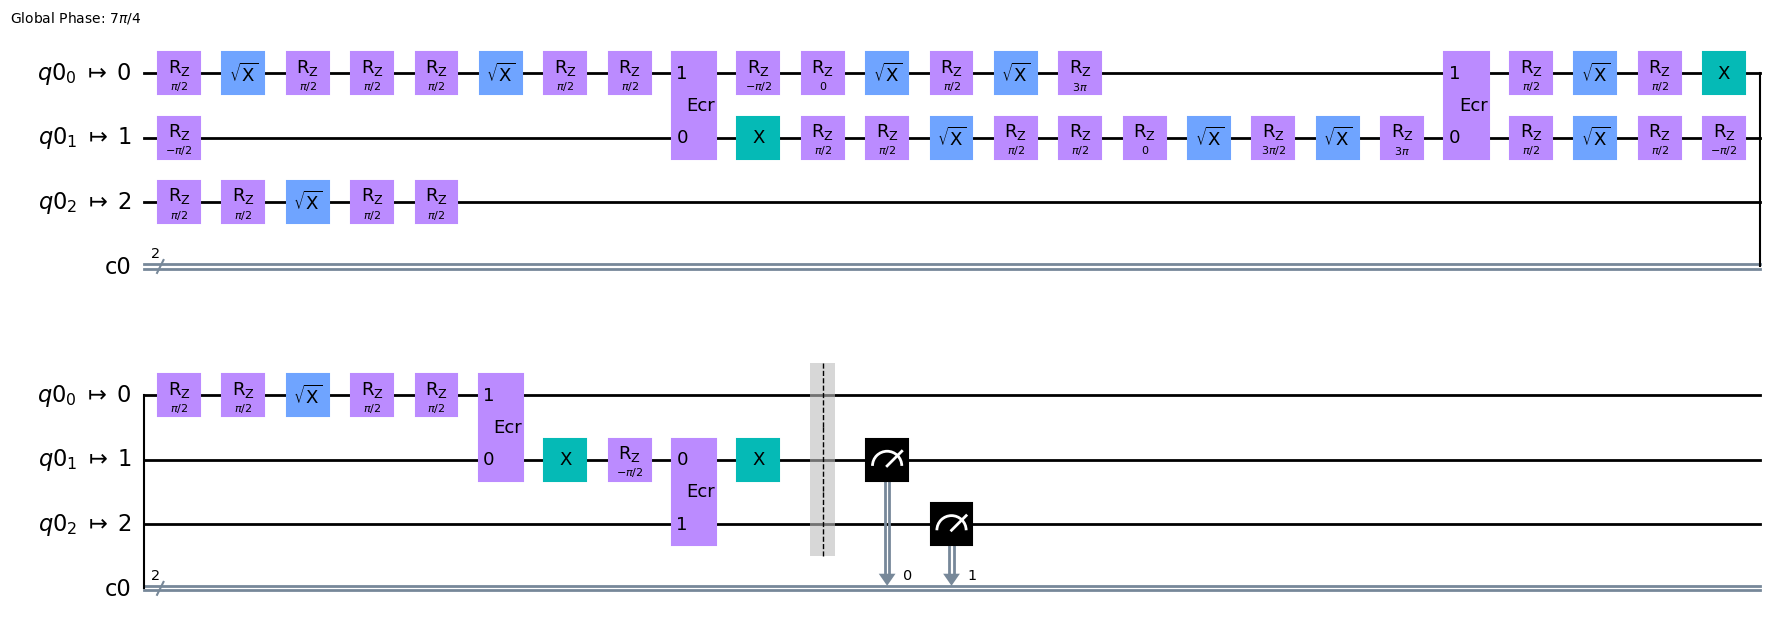

In [62]:
# See that result of transpilation is not-deterministic (run this few times on level 0)
# Circuit depth is not-deterministic too!

transpiled_circuit_optimized = transpile(circuit, backend, optimization_level=0)
transpiled_circuit_optimized.draw(output='mpl', idle_wires=False)

* In Qiskit, we represent circuits internally using a Directed Acyclic Graph (DAG).
* Three kinds of graph nodes exist: qubit/clbit input nodes (green), operation nodes (blue), and output nodes (red).
* Each edge indicates data flow (or dependency) between two nodes.

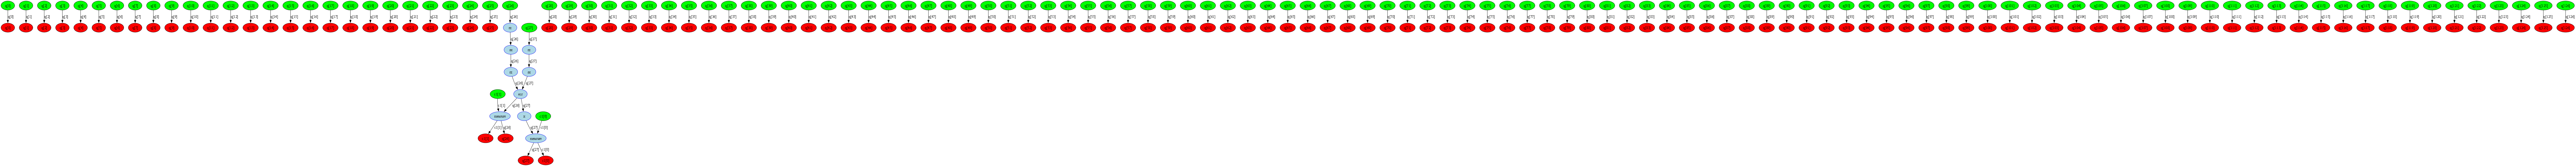

In [33]:
from IPython.display import display
from PIL import Image

dag = circuit_to_dag(transpiled_circuit)
dag_drawer(dag)

## Let's see how this works for bigger circuits, but first...


## ...digression on how we can analyze circuit size and resources

* Very important to understand what is our final circuit after transpilation as it directly impacts the results.
* The more gates, the more errors get introduced

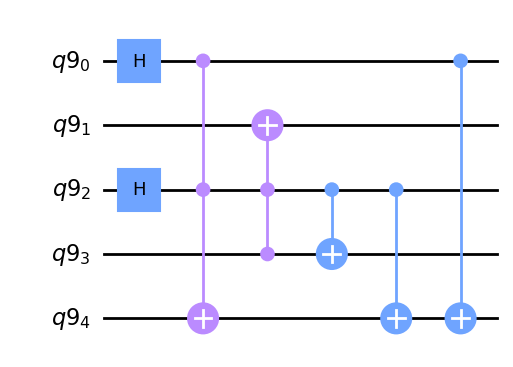

In [18]:
from qiskit import QuantumCircuit, QuantumRegister

q = QuantumRegister(5)
circuit2 = QuantumCircuit(q)
circuit2.h(q[0])
circuit2.h(q[2])
circuit2.ccx(q[0], q[2], q[4])
circuit2.ccx(q[3], q[2], q[1])
circuit2.cx(q[2], q[3])
circuit2.cx(q[2], q[4])
circuit2.cx(q[0], q[4])
circuit2.draw(output='mpl')

In [19]:
# total number of operations in the circuit. no unrolling is done.
circuit2.size()

7

In [20]:
# number of qubits in the circuit
circuit2.width()

5

In [21]:
circuit2.depth()

6

In [22]:
# a breakdown of operations by type
circuit2.count_ops()

OrderedDict([('cx', 3), ('h', 2), ('ccx', 2)])

In [23]:
# number of unentangled subcircuits in this circuit.
# each subcircuit can in principle be executed on a different quantum processor!
circuit2.num_tensor_factors()

1

## ...so let's now transpile this more complex circuit

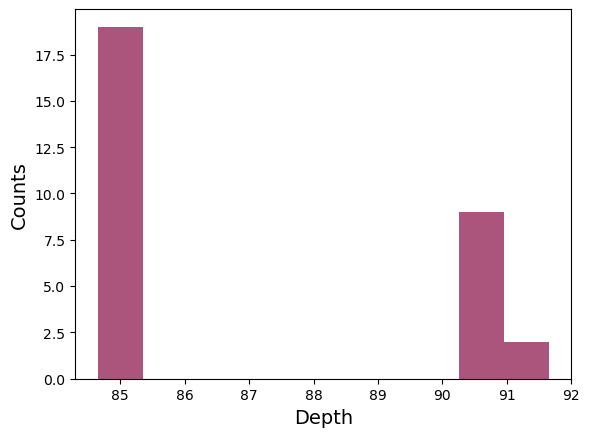

In [29]:
# With no optimization:

import matplotlib.pyplot as plt

depths = []
for _ in range(30):
    depths.append(transpile(circuit2, backend).depth())

plt.hist(depths, align='left', color='#AC557C')
plt.xlabel('Depth', fontsize=14)
plt.ylabel('Counts', fontsize=14);

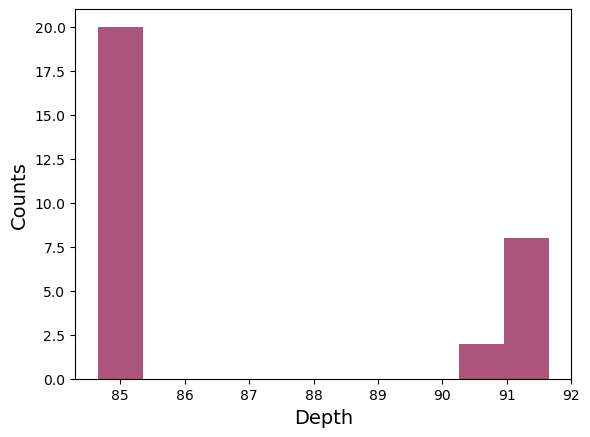

In [30]:
# ...and with optimization level 2:

depths = []
for _ in range(30):
    depths.append(transpile(circuit2, backend, optimization_level=2).depth())

plt.hist(depths, align='left', color='#AC557C')
plt.xlabel('Depth', fontsize=14)
plt.ylabel('Counts', fontsize=14);

In [31]:
for level in range(4):
    transpiled_circuit2 = transpile(circuit2, backend, optimization_level=level)
    print('---------- Level = ' + str(level) + ' ----------')
    print('gates = ', transpiled_circuit2.count_ops())
    print('depth = ', transpiled_circuit2.depth())

---------- Level = 0 ----------
gates =  OrderedDict([('rz', 441), ('sx', 153), ('ecr', 51), ('x', 51)])
depth =  377
---------- Level = 1 ----------
gates =  OrderedDict([('rz', 67), ('sx', 53), ('ecr', 24), ('x', 5)])
depth =  85
---------- Level = 2 ----------
gates =  OrderedDict([('rz', 67), ('sx', 53), ('ecr', 24), ('x', 5)])
depth =  85
---------- Level = 3 ----------
gates =  OrderedDict([('rz', 94), ('sx', 57), ('ecr', 18)])
depth =  83


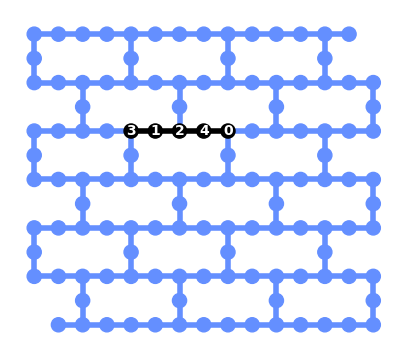

In [32]:
# If your algorithm does not use all the qubits in the backend, you can visualize qubits used in the backend with:

plot_circuit_layout(transpiled_circuit2, backend)

# in our case all qubits are used.

Youcan also enforce centain mapping of virtual qubite (from your algorithm) onto physical qubits.
This can be done this way:
    
`transpile(circuit, backend=backend2, initial_layout=[1, 0, 2], optimization_level=3)`

In this example virtual qubit 1 is on physical 0, virtual 0 on physical 1 and virtual 2 on physical 2 (physical qubit is the position in the array).

# How transpiler works?

* Transpiler uses so called PassManager (depending on optimization level)
* Pass Manager does a set of passes transforming the circuit until the final shape.
* Passes can be transformation passes or analysis passes.
* Analytical passes write conclusions in a commonly accessible properties
* Transformation passes trandform the circuit by using the properties from analysis (in read-only mode)

* Passes are divided into the following categories:
    * **yout selection** mapping virtual to physical qubits
    * **Routing** - using swap gates mapping algorithm to procesor topology
    * **Basis change** - map gates used in the algorithm to the natively available ones
    * **Optimizations** - replacing sets of gates with just one, cancelling not needed gates, etc.
    * **Analysis** - counting operations, calculating width, depth, etc.
    * Other...

* There are pre-defined PassManager implementations depending on optimization levels
* One can use a custom PassManager which will be tuned for certain applications.

* More details: 
    * https://qiskit.org/documentation/apidoc/transpiler.html
    * https://qiskit.org/documentation/apidoc/transpiler_passes.html
    * https://qiskit.org/documentation/tutorials/circuits_advanced/04_transpiler_passes_and_passmanager.html

In [34]:
#Getting info about all existing transpiler passes:

from qiskit.transpiler import passes
i = 1
for passitem in dir(passes):
    if passitem[0].isupper(): 
        print(str(i) + '\t' + passitem)
        i=i+1

1	ALAPSchedule
2	ALAPScheduleAnalysis
3	ASAPSchedule
4	ASAPScheduleAnalysis
5	AlignMeasures
6	ApplyLayout
7	BIPMapping
8	BarrierBeforeFinalMeasurements
9	BasicSwap
10	BasisTranslator
11	CSPLayout
12	CXCancellation
13	CXDirection
14	CheckCXDirection
15	CheckGateDirection
16	CheckMap
17	Collect1qRuns
18	Collect2qBlocks
19	CollectCliffords
20	CollectLinearFunctions
21	CollectMultiQBlocks
22	CommutationAnalysis
23	CommutativeCancellation
24	CommutativeInverseCancellation
25	Commuting2qGateRouter
26	ConsolidateBlocks
27	ConstrainedReschedule
28	ContainsInstruction
29	ConvertConditionsToIfOps
30	CountOps
31	CountOpsLongestPath
32	CrosstalkAdaptiveSchedule
33	DAGFixedPoint
34	DAGLongestPath
35	Decompose
36	DenseLayout
37	Depth
38	DynamicalDecoupling
39	EchoRZXWeylDecomposition
40	EnlargeWithAncilla
41	Error
42	FixedPoint
43	FullAncillaAllocation
44	GateDirection
45	GatesInBasis
46	HighLevelSynthesis
47	HoareOptimizer
48	InstructionDurationCheck
49	InverseCancellation
50	Layout2qDistance
51	La

### Let's use our initial simple Bell state circuit to visualize the concept...

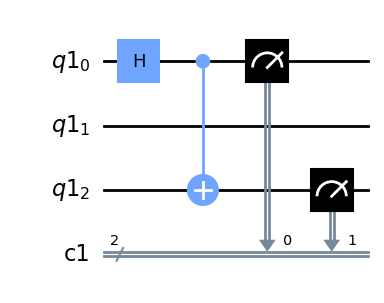

In [35]:
circuit.draw(output='mpl')

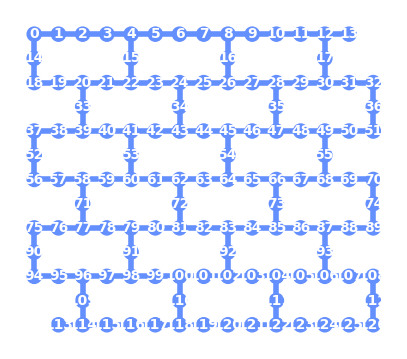

In [36]:
plot_gate_map(backend) 

**Initial layout** - mapping 'virtual' qubits onto the physical qubits in quantum processor
* Trivial layout (levels 0 and 1): maps virtual qubits to the same numbered physical qubits, i.e. [0,1,2,3,4] -> [0,1,2,3,4]
* Dense layout (levels 2 and 3): Find the sub-graph of the device with same number of qubits as the circuit with the greatest connectivity

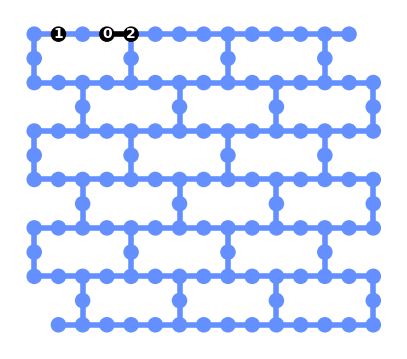

In [37]:
transpiled_circuit_initial_map = transpile(circuit, backend, initial_layout=[3, 1, 4])
# Virtual -> physical
#    0    ->    3
#    1    ->    1
#    2    ->    4

plot_circuit_layout(transpiled_circuit_initial_map, backend)

**StochasticSwap** - finds set of swaps which move qubits' states in such way, that it is possible to implement all CNOT gates in the circuit. This is a stochastic heuristic algorithm.

**Unroller** - represents circuit gates with natively implemented ones

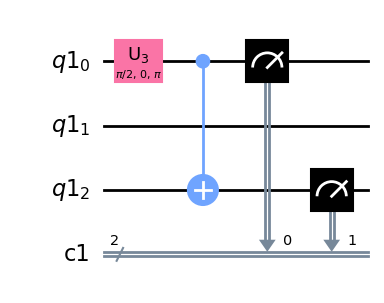

In [38]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)

# Unroller transforms the gates in the initial circuit to native set of gates implemented on given device

new_circuit = pm.run(circuit)
new_circuit.draw(output='mpl')

#pass_manager_drawer(pm, filename='C:\\temp\\dag.png')

You can create circuit for your custom native set of gates if needed.

# Quantum Volume
* Real capabilities of quantum computers are described by **Quantum Volume** - not number of qubits
* Currently biggest QV reached on IBM processors is **QV=512**
* If we want our circuit to generate meaningful results, it needs to fit into the average size of benchmarking circuits size **AFTER TRANSPILATION**

* Good news is that IBM plans to **double QV every year**

## Comparing quantum states - Hellinger fidelity between two counts distributions

In [39]:
from qiskit import QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info.analysis import hellinger_fidelity

circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0,1]) 

#Let's generate first state for comparison (using simulator):
backend1 = QasmSimulator()
job1 = backend1.run(circuit)
result1 = job1.result()
counts1=result1.get_counts()

In [8]:
from qiskit import IBMQ, execute

#Let's generate second state for comparison (on real device):
provider = IBMQ.load_account()
backend2 = provider.get_backend('ibm_kyoto')
job2 = execute(circuit, backend=backend2)
job2.job_id()

ibmqfactory.load_account:WARNING:2021-11-30 13:50:23,101: Credentials are already in use. The existing account in the session will be replaced.


'61a61e1788e4ca29be4638a9'

In [15]:
from qiskit.tools.monitor import job_monitor
job_monitor(job2, interval=5)

Job Status: job has successfully run


In [16]:
result2 = job2.result()
counts2=result2.get_counts()

hellinger_fidelity(counts1, counts2)

0.9587800299828791

## Exercise 4.1

Run the following circuit on a real device in such a way that the fidelity of the state compared to simulator would be as close to 1 as possible.

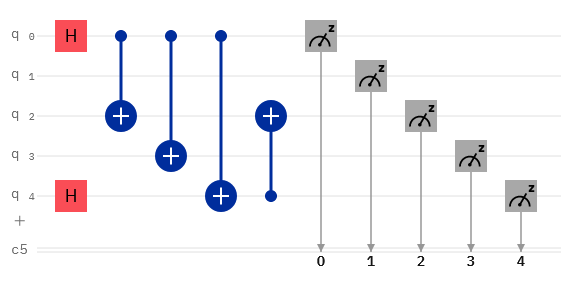

### Homework

- watch the 30 minute video on a famous IBM paper in Nature demonstrating getting real value from noise quantum computers: https://www.youtube.com/watch?app=desktop&v=CWn5tv9CgBg&sf182528027=1
- I highly recommend to also read the full original paper: https://www.nature.com/articles/s41586-023-06096-3

Any volunteer to summarize the paper next week?